In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[*********************100%***********************]  1 of 1 completed
/var/folders/ft/13vjdvvx6cz9kjsf3mxdsghm0000gn/T/ipykernel_94977/355531327.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(dat

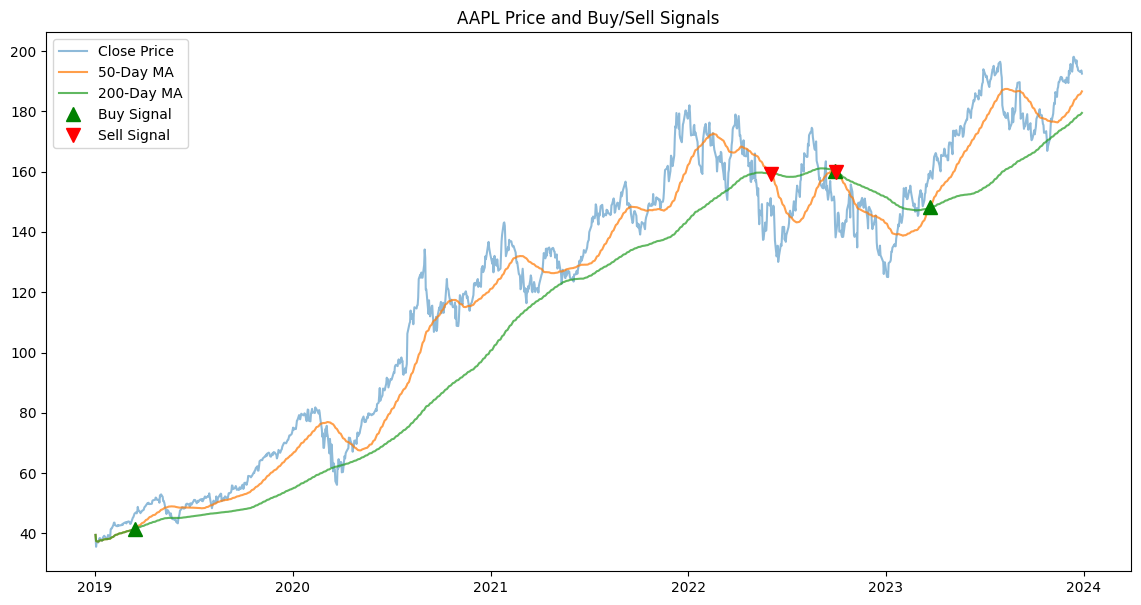

In [2]:
# Downloading Apple (AAPL) data for the past 5 years
ticker = 'AAPL'
data = yf.download(ticker, start="2019-01-01", end="2024-01-01")

#Remove rows with missing data
data = data.dropna()


#calculating short and long moving averages (e.g., 50-day and 200-day)
short_window = 50
long_window = 200

data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

data['Signal'] = 0.0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)

data['Position'] = data['Signal'].diff()

# Plot the Data
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Short_MA'], label=f'{short_window}-Day MA', alpha=0.75)
plt.plot(data['Long_MA'], label=f'{long_window}-Day MA', alpha=0.75)

# Plot Buy signals
plt.plot(data.loc[data['Position'] == 1.0].index, 
         data['Short_MA'][data['Position'] == 1.0], 
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot Sell signals
plt.plot(data.loc[data['Position'] == -1.0].index, 
         data['Short_MA'][data['Position'] == -1.0], 
         'v', markersize=10, color='r', lw=0, label='Sell Signal')


plt.title(f'{ticker} Price and Buy/Sell Signals')
plt.legend()
plt.show()